In [17]:
import matplotlib.pyplot as plt
import pickle
from skimage.transform import rotate
from scipy import ndimage
from skimage.util import img_as_ubyte
from joblib import Parallel, delayed
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.ensemble.forest import _generate_sample_indices
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product
import seaborn as sns

#import sys
#sys.path.append("../lifelong_learner")
#from lf import LF

%matplotlib inline

In [18]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [19]:
task = range(0,10,1)
ntrees = range(10,300,10)

ntask = len(task)
n_ntrees = len(ntrees)

err = np.zeros((ntask,n_ntrees),dtype=float)

for t in task:
    for count,tree in enumerate(ntrees):
        filename = '../result/taskRF_'+str(t)+'_'+str(tree)
        err[t-1,count] = 1 - unpickle(filename)
        


In [20]:
err

array([[0.33916667, 0.38733333, 0.4105    , 0.42283333, 0.4405    ,
        0.43983333, 0.4505    , 0.45083333, 0.45383333, 0.45883333,
        0.4635    , 0.46566667, 0.46433333, 0.46683333, 0.46866667,
        0.47      , 0.47016667, 0.47316667, 0.476     , 0.47633333,
        0.47783333, 0.478     , 0.47716667, 0.477     , 0.4785    ,
        0.479     , 0.47733333, 0.4785    , 0.477     ],
       [0.45266667, 0.49983333, 0.51416667, 0.52966667, 0.54166667,
        0.54716667, 0.55083333, 0.5565    , 0.56083333, 0.56233333,
        0.5605    , 0.5625    , 0.5625    , 0.56283333, 0.56816667,
        0.56416667, 0.56433333, 0.566     , 0.567     , 0.56583333,
        0.5685    , 0.5695    , 0.56683333, 0.57083333, 0.56883333,
        0.57166667, 0.572     , 0.57216667, 0.57166667],
       [0.372     , 0.41916667, 0.44833333, 0.46166667, 0.465     ,
        0.4775    , 0.48083333, 0.4855    , 0.485     , 0.4925    ,
        0.4925    , 0.49583333, 0.497     , 0.49583333, 0.49816667,
  

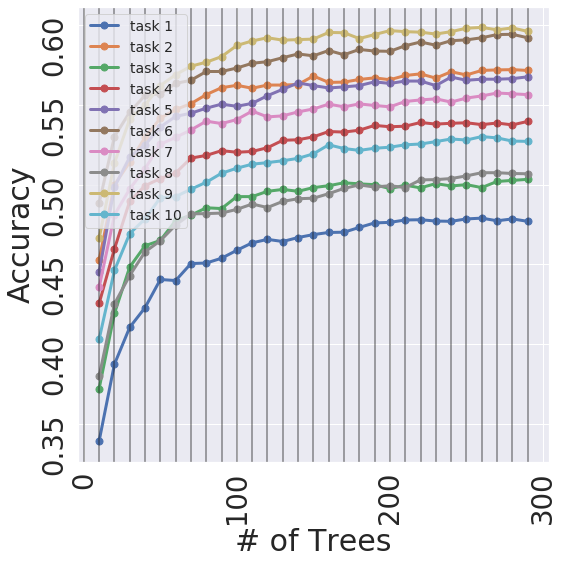

In [21]:
sns.set()

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    ax.plot(ntrees, err[i,:], marker='.', label = 'task '+str(i+1), markersize=14, linewidth=3)

#ax.set_xticks([100,1000,2000,3000,4000,5000])
#ax.set_yticks([0.9, 1.0, 1.1, 1.2])
#ax.set_ylim(0.89, 1.21)
ax.tick_params(labelsize=27.5,rotation=90)
ax.legend(loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('# of Trees', fontsize=30)

#ax.grid(axis='x')

for i in range(0,300,10):
    ax.axvline(x = i, linewidth=1.5,alpha=0.5, color='k')

#ax.axvline(x = 3500, linewidth=3, color='k')

#ax.hlines(0.422, 1,5000, colors='k', linestyles='dashed',linewidth=2)

plt.tight_layout()


plt.savefig('/data/Jayanta/tasks.png',dpi=500)